<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Parra Ruiz Ariel Alejandro** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [148]:
import miningscience as msc

help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    La función download_pubmed me devuelve la información de las publicaciones
    o artículos de la búsqueda Ecuador genomics
    from Bio import Entrez
    Entrez.email = "ariel.parra@est.ikiam.edu.ec"
    handle = Entrez.esearch(db="pubmed", term=keyword)
    record = Entrez.read(handle)
    return(record)

Help on function mining_pubs in module miningscience:

mining_pubs(tipo)
        La función minco usa los módulos re y Bio con la función Entrez y Medline.
        Con el parámetro tipo, la función regresa lo siguiente:
        Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
        Si el tipo es "AU" recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
        Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.
        def mi


## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [149]:
c=msc.download_pubmed(keyword="Ecuador genomics")
        
print("El número de artículos es: ", c["Count"])
print("El PMID del primer artículo es:", c["IdList"][0])


El número de artículos es:  193
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [150]:
# Escriba aquí su código para el ejercicio 3   
import pandas as pd
print("    pub_year")
df1=msc.mining_pubs(tipo="PD")
print(pd.concat([df1.iloc[:2],df1.iloc[190:]]))
print("")
print("    pub_authors")
df2=msc.mining_pubs(tipo="AU")
print(pd.concat([df2.iloc[:2],df2.iloc[190:]]))
print("")
print("    countries")
df3=msc.mining_pubs(tipo="AD")
print(pd.concat([df3.iloc[:2],df3.iloc[199:]]))

    pub_year
         PMID DP_year
0    35121084    2022
1    35120121    2022
190  19018989    2008
191  17187350    2007

    pub_authors
         PMID  num_auth
0    35121084        12
1    35120121        14
190  19018989         7
191  17187350         1

    countries
           country  num_auth
0       Washington        10
1            Wales         5
199  New Caledonia        13
200        Croatia         7


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


media: 12.8
desviación estandar: 12.70800272794011


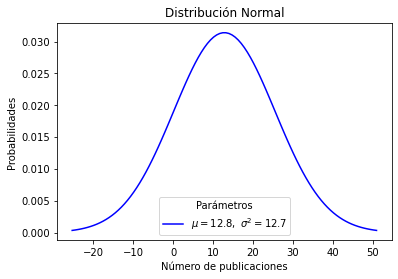

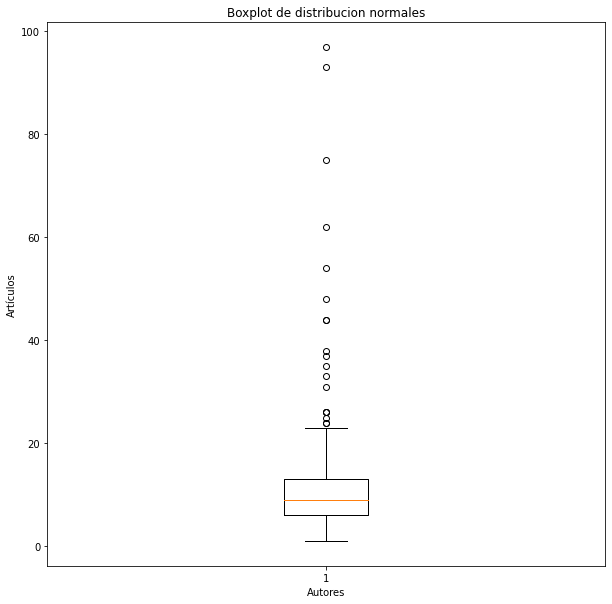

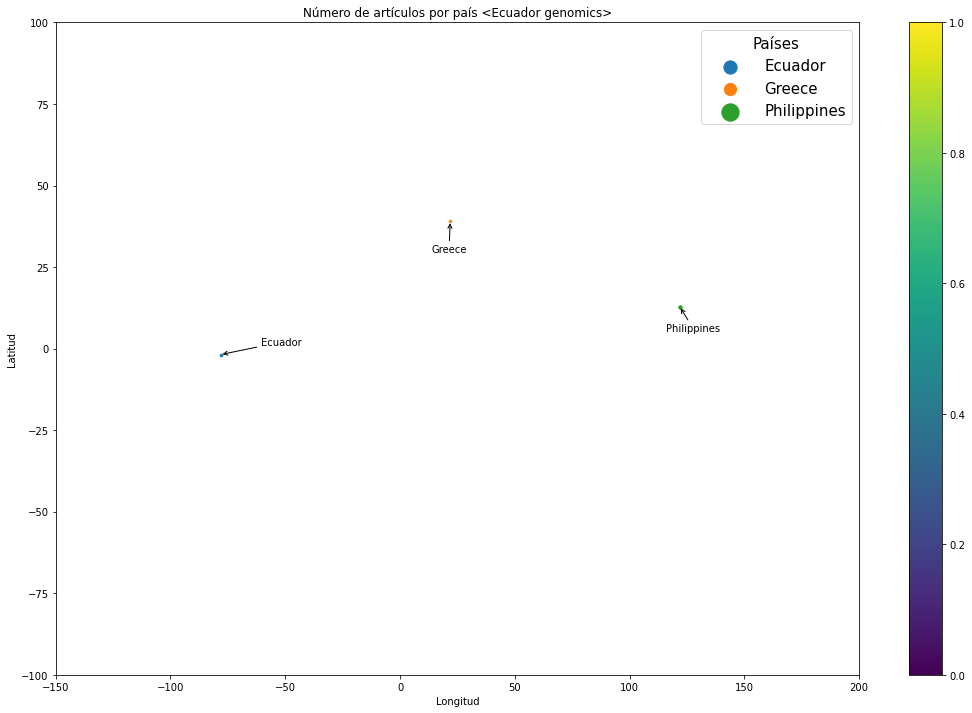

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import numpy as np
i=list(df1["DP_year"])
s=pd.Series(i)
h=list(set(s))
g=s
f=h
h=[0]*len(f)
k=0
for elem in f:
    d=0
    for comp in g:
        if elem ==str(comp):
            d=d+1
    h[k]=d
    k=k+1
mean=np.average(h)
print("media:",mean)
stan=np.std(h)
print("desviación estandar:",stan)
x=np.linspace(mean -3*stan,mean +3*stan, 100)
sigma=stan
label='$\mu = %.1f, \ \sigma^2=%.1f$' %(mean, stan)
y_norm = stats.norm.pdf(x, mean, sigma)
plt.plot(x, y_norm, label=label, c = "blue")
plt.xlabel("Número de publicaciones")
plt.ylabel('Probabilidades')
plt.title('Distribución Normal')
plt.legend(title = "Parámetros")
plt.show()

###############################################################################
df2=df2.drop(79)
i=list(df2["num_auth"])
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(i)
plt.xlabel('Autores')
plt.ylabel('Artículos')
plt.title('Boxplot de distribucion normales')
plt.show()
###############################################################################
%matplotlib inline
plt.scatter(-78.183406,-1.831239,s=7,alpha=1)
plt.scatter(21.824312,  39.074208,s=6,alpha=1)
plt.scatter(121.774017, 12.879721,s=12,alpha=1)
plt.colorbar()

plt.xlim(-150, 200)
plt.ylim(-100, 100)
# add Ecuador, Greece, Philippines.  
ard = dict(arrowstyle="->")
plt.annotate('Ecuador', xy = ( -78.183406,-1.831239), 
               xytext = (-60.712891,1.09024 ), arrowprops = ard)
plt.annotate('Greece', xy = (21.824312,  39.074208), 
               xytext = (13.639968,29.420695 ), arrowprops= ard)
plt.annotate('Philippines', xy = (121.774017, 12.879721), 
               xytext = (115.92528,5.235004 ), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.title("Número de artículos por país <Ecuador genomics>")
países=["Ecuador", "Greece", "Philippines"]
plt.legend(países,title = "Países",title_fontsize=15,fontsize=15,markerscale=5, handlelength=3)
plt.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

#### Interpretación de la distribución normal
Esto nos da a entender que el o los artículos que más se podrán encontrar son los de los años que se acercan a la media.
#### Interpretación del boxplot
El boxplot nos miestra que el 50% de autores se encuentran entre 5 y 15 artículos.
#### Interpretación de la nube de puntos
La nube de puntos indica a 3 países en donde el tamaño del punto define la cantidad de autores por cada país, en este caso se elijió a Ecuador, Grecia y Filipinas, los cuales no varían mucho en tamaño y por lo tanto tampoco en cantidad.

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [ ]:
# Escriba aquí su código para el ejercicio 6
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
with open("sequence.seq","r") as f:
    ClustalAlign = AlignIO.read(f, "clustal")
print(ClustalAlign)
calculator=DistanceCalculator("indetity")
distane_matriz=calculator.get_distance(ClustalAlign)
#clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
#clustalw_cline = ClustalwCommandline(clustalw_exe, infile = f)
#assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
#stdout, stderr = clustalw_cline()
#print(clustalw_cline)

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```